In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
from sklearn import preprocessing
import seaborn as sns

In [2]:
df_2019 = pd.read_csv("data/2019_WEP.csv")
df_2019.tail()

,INFORMATION TYPE,DATE,PERIOD,WEP ($/MWh),USEP ($/MWh),AFP ($/MWh),HEUR ($/MWh),HLCU ($/MWh),MEUC ($/MWh),EMC Price Cap Fees ($/MWh),EMC Price Adj Fees ($/MWh),PSO Fees ($/MWh)
17515,WEP,31 Dec 2019,44,75.21,75.60,0.20,-1.38,0.0,0.21,0.3228,0.0,0.262
17516,WEP,31 Dec 2019,45,72.43,72.47,0.17,-1.01,0.0,0.21,0.3228,0.0,0.262
17517,WEP,31 Dec 2019,46,69.58,69.45,0.18,-0.84,0.0,0.21,0.3228,0.0,0.262
17518,WEP,31 Dec 2019,47,70.21,69.96,0.13,-0.68,0.0,0.21,0.3228,0.0,0.262
17519,WEP,31 Dec 2019,48,66.77,66.69,0.05,-0.76,0.0,0.21,0.3228,0.0,0.262


count    17520.000000
mean        98.630563
std         52.545051
min         -0.410000
25%         81.710000
50%         91.105000
75%        102.332500
max       1351.270000
Name: WEP ($/MWh), dtype: float64


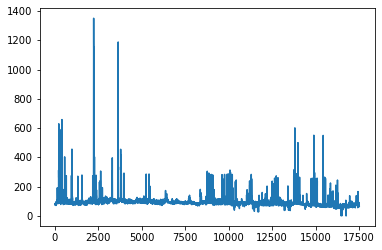

In [3]:
print (df_2019['WEP ($/MWh)'].describe())
df_2019['WEP ($/MWh)'].plot()

count    17520.000000
mean        96.463124
std         32.723963
min         -0.410000
25%         81.710000
50%         91.105000
75%        102.332500
max        256.265716
Name: WEP ($/MWh), dtype: float64


c:\users\atan0\github\fyp\fyp-code\singapore\venv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


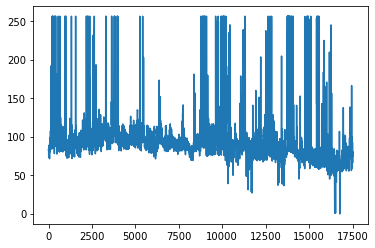

In [4]:
truncated = df_2019.copy()
#Replace outlier with upper limit
std = truncated['WEP ($/MWh)'].std()
mean = truncated['WEP ($/MWh)'].mean()

truncated['WEP ($/MWh)'].loc[truncated['WEP ($/MWh)'] > mean + 3*std] = mean + 3*std

print (truncated['WEP ($/MWh)'].describe())
truncated['WEP ($/MWh)'].plot()

In [5]:
df_2019_full = pd.read_csv("data/2019_full_data.csv", index_col=0, parse_dates=True)
df_2019_full.head()

,PERIOD,WEP ($/MWh),USEP ($/MWh),DEMAND (MW),GROSS INJECTION (MWh),NET INJECTION (MWh)
DATE,,,,,,
2019-01-01 00:00:00,1,83.33,82.70,5201.890,2555.100,2362.296
2019-01-01 00:30:00,2,83.83,82.71,5150.461,2549.410,2357.615
2019-01-01 01:00:00,3,83.19,82.70,5106.794,2519.013,2327.042
2019-01-01 01:30:00,4,83.13,82.69,5075.841,2492.473,2300.457
2019-01-01 02:00:00,5,83.20,82.67,5044.147,2453.576,2261.511


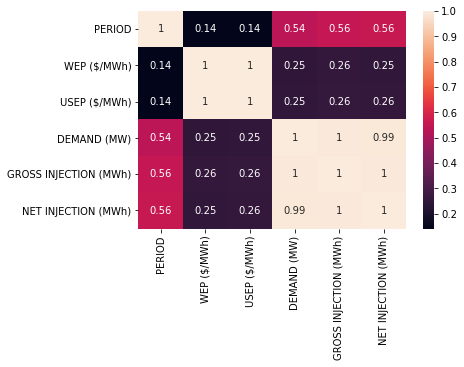

In [6]:
corr=df_2019_full.corr()
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
df_2018 = pd.read_csv("data/2018_WEP.csv")
df_2017 = pd.read_csv("data/2017_WEP.csv")
df_2016 = pd.read_csv("data/2016_WEP.csv")
df_2015 = pd.read_csv("data/2015_WEP.csv")
df_WEP = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])['WEP ($/MWh)'].to_frame()
time_index = pd.date_range(start='1/1/2015 00:00:00', end='31/12/2019 23:30:00', freq="30min")
df_WEP.index = time_index

In [8]:
df_WEP

,WEP ($/MWh)
2015-01-01 00:00:00,92.55
2015-01-01 00:30:00,91.56
2015-01-01 01:00:00,89.82
2015-01-01 01:30:00,91.50
2015-01-01 02:00:00,86.12
...,...
2019-12-31 21:30:00,75.21
2019-12-31 22:00:00,72.43
2019-12-31 22:30:00,69.58
2019-12-31 23:00:00,70.21


In [9]:
#Add time information into data
df_WEP=df_WEP.resample("H").mean()
df_WEP['Year'] = df_WEP.index.year
df_WEP['Month'] = df_WEP.index.month
df_WEP['day_of_week'] = df_WEP.index.day_name()
df_WEP['day_of_week_int'] = df_WEP.index.dayofweek
df_WEP['hour'] = df_WEP.index.hour

In [10]:
df_WEP.head()

,WEP ($/MWh),Year,Month,day_of_week,day_of_week_int,hour
2015-01-01 00:00:00,92.055,2015,1,Thursday,3,0
2015-01-01 01:00:00,90.660,2015,1,Thursday,3,1
2015-01-01 02:00:00,82.655,2015,1,Thursday,3,2
2015-01-01 03:00:00,76.625,2015,1,Thursday,3,3
2015-01-01 04:00:00,75.865,2015,1,Thursday,3,4


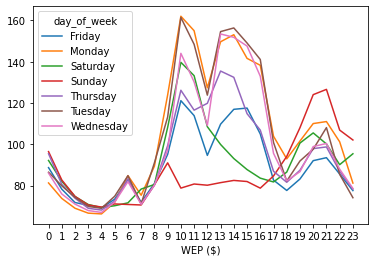

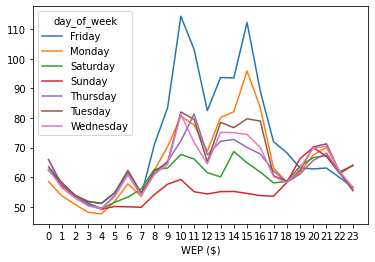

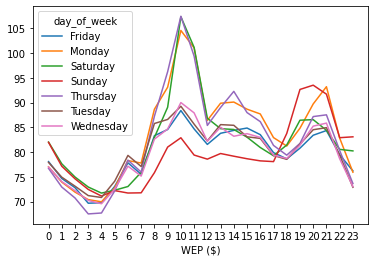

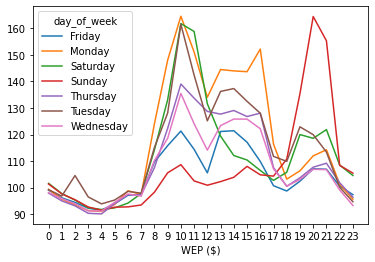

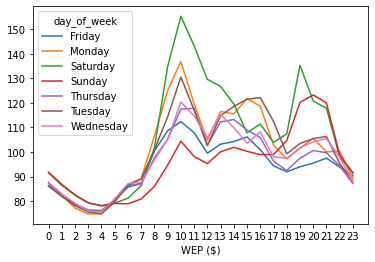

In [11]:
for year in range(2015,2020):
    df_WEP[str(year)].pivot_table(index='hour',columns='day_of_week', values='WEP ($/MWh)').plot()
    plt.xticks(range(0,24))
    plt.xlabel(year)
    plt.xlabel("WEP ($)")

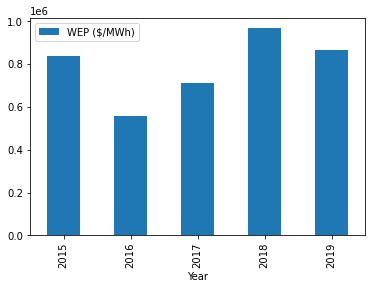

In [12]:
df_WEP.resample('Y').agg({'WEP ($/MWh)':'sum','Year':'mean'}).plot(kind='bar',y='WEP ($/MWh)',x='Year')

Text(0, 0.5, 'WEP ($)')

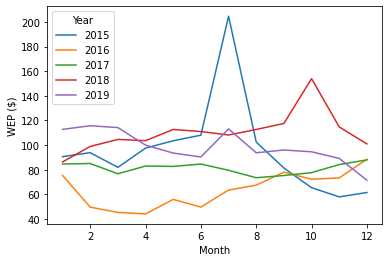

In [13]:
df_WEP.pivot_table(index='Month',columns='Year', values='WEP ($/MWh)').plot()
plt.ylabel("WEP ($)")

Text(0, 0.5, 'WEP ($)')

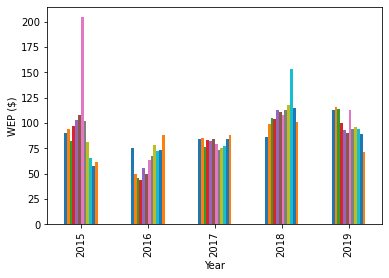

In [14]:
df_WEP.pivot_table(index='Year',columns='Month', values='WEP ($/MWh)').plot(kind='bar',legend=False)
plt.ylabel("WEP ($)")

([<matplotlib.axis.XTick at 0x24de75d2dd8>,
 <a list of 14 Text major ticklabel objects>)

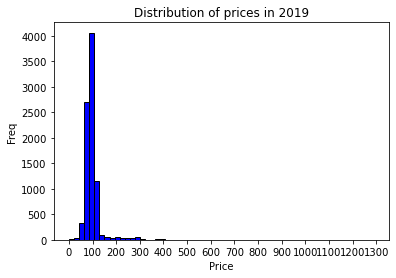

In [15]:
plt.hist(df_WEP['2019']['WEP ($/MWh)'], color = 'blue', edgecolor = 'black', bins = 60)

plt.title('Distribution of prices in 2019')
plt.xlabel('Price')
plt.ylabel('Freq')
plt.xticks(range(0,1400,100))

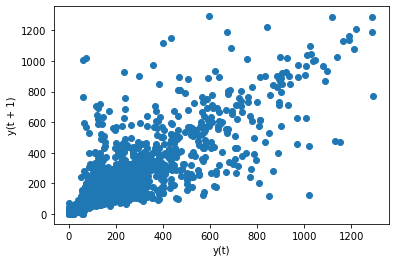

In [16]:
pd.plotting.lag_plot(df_WEP['WEP ($/MWh)'],lag=1)

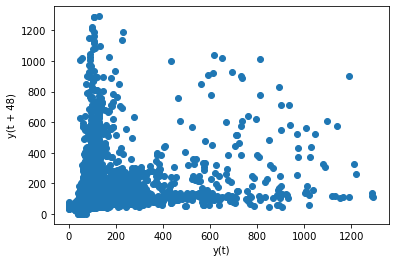

In [17]:
pd.plotting.lag_plot(df_WEP['WEP ($/MWh)'],lag=48)